# Assignment 2 - Clustering

Goal
* Implement KMeans
* Performance analysis of our version of kmeans v/s sklearn's version of KMeans
* Running various clusering algorithms againsts datasets

In [50]:
# importing general libraries for this assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# Testing my implementation of KMeans


In [100]:
# My_KMeans is defined inside kmeans.py file
from kmeans import My_KMeans

In [101]:
# example dataset
X = [[0, 0], [2, 2], [0, 2], [2, 0], [10, 10], [8, 8], [10, 8], [8, 10]]

In [106]:
# running kmeans algo using cluster size = 2
kmeans = My_KMeans(k=2, max_iterations=100)
cluster_hypotheses, centroids = kmeans.fit(X)

In [107]:
print("Cluster hypotheses:", cluster_hypotheses)
print("Centroids:", centroids)

Cluster hypotheses: [1, 1, 1, 1, 0, 0, 0, 0]
Centroids: [[9.0, 9.0], [1.0, 1.0]]


# Performance analysis

In [109]:
from sklearn.datasets import make_blobs

In [110]:
X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)
X

array([[-0.84177847,  7.86655225],
       [-1.21515296,  8.01484649],
       [ 1.84320847, -0.07222085],
       ...,
       [-1.83141457,  2.2867542 ],
       [-1.84639796,  3.30491543],
       [ 0.28256062,  4.77250619]])

In [114]:
kmeans = My_KMeans(k=4, max_iterations=100)
cluster_hypotheses, centroids = kmeans.fit(X)
centroids

[[0.9004393234899268, 4.32217463716],
 [-1.2040579337244177, 7.837858432492295],
 [1.9877063026473274, 0.8318857877497887],
 [-1.4997094181421273, 2.905741940858995]]

## Actual cluster assignments vs my cluster hypotheses

In [115]:
comparison_df = pd.DataFrame({'cluster_assignments': cluster_assignments, 'cluster_hypotheses': cluster_hypotheses})
comparison_df['difference'] = comparison_df.cluster_assignments - comparison_df.cluster_hypotheses
comparison_df

,cluster_assignments,cluster_hypotheses,difference
0,3,1,2
1,3,1,2
2,1,2,-1
3,3,1,2
4,1,2,-1
...,...,...,...
695,2,3,-1
696,3,1,2
697,2,3,-1
698,2,3,-1


In [116]:
comparison_df[comparison_df['difference'] == 0]

,cluster_assignments,cluster_hypotheses,difference
10,0,0,0
15,0,0,0
16,0,0,0
26,0,0,0
31,0,0,0
...,...,...,...
678,0,0,0
684,0,0,0
685,0,0,0
688,0,0,0


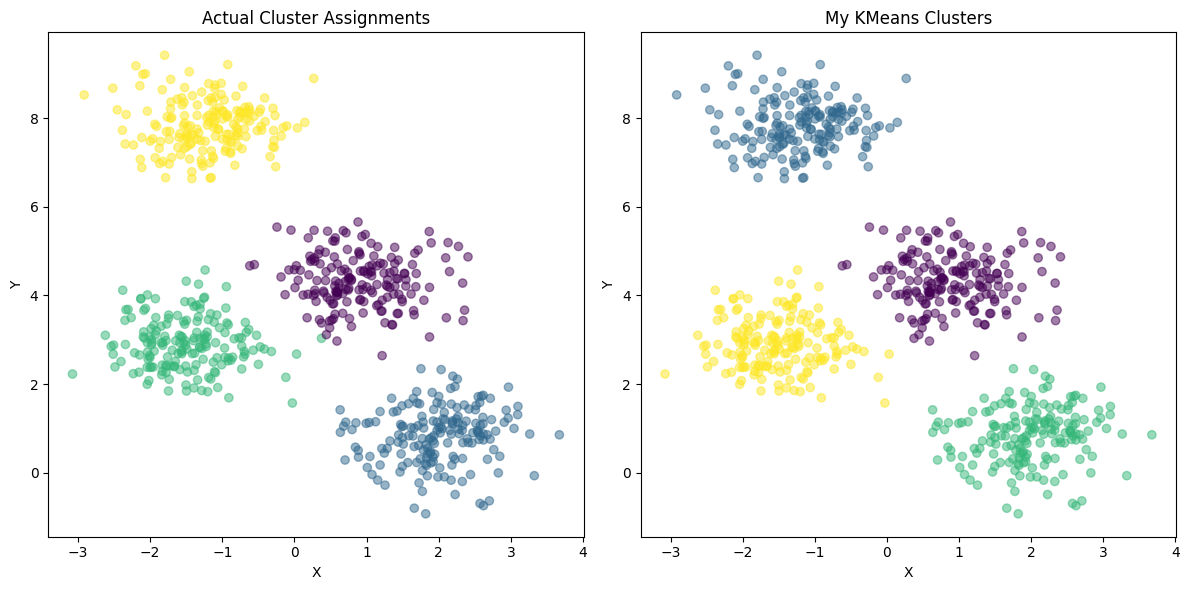

In [118]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.5)
plt.title('Actual Cluster Assignments')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=cluster_hypotheses, cmap='viridis', alpha=0.5)
plt.title('My KMeans Clusters')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

# Extended K-Means

In [119]:
kmeans = My_KMeans(k=4, max_iterations=100, balanced=True)
cluster_hypotheses, centroids = kmeans.fit(X)
centroids

[[1.9877063026473274, 0.8318857877497887],
 [-1.2040579337244177, 7.837858432492295],
 [-1.4997094181421273, 2.905741940858995],
 [0.9004393234899268, 4.32217463716]]

In [129]:
unique_values, counts = np.unique(cluster_hypotheses, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 175
Value: 1, Count: 175
Value: 2, Count: 174
Value: 3, Count: 176


* As we can see, in my extended version of K-Means, there are roughly same no. of samples in each clusters. i.e **175**

## Actual assignments vs sklearn's hypotheses

In [121]:
sk_kmeans = KMeans(n_clusters=4)

In [122]:
sk_kmeans.fit(X)

D:\SAHIL\Coding\Machine Learning\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [123]:
sk_kmeans.cluster_centers_

array([[ 0.90043932,  4.32217464],
       [ 1.9877063 ,  0.83188579],
       [-1.20405793,  7.83785843],
       [-1.49970942,  2.90574194]])

In [124]:
comparison_df['sk_hypotheses'] = sk_kmeans.labels_
comparison_df['sk_difference'] = comparison_df.cluster_assignments - comparison_df.sk_hypotheses
comparison_df

,cluster_assignments,cluster_hypotheses,difference,sk_hypotheses,sk_difference
0,3,1,2,2,1
1,3,1,2,2,1
2,1,2,-1,1,0
3,3,1,2,2,1
4,1,2,-1,1,0
...,...,...,...,...,...
695,2,3,-1,3,-1
696,3,1,2,2,1
697,2,3,-1,3,-1
698,2,3,-1,3,-1


In [125]:
comparison_df[comparison_df['sk_difference'] == 0]

,cluster_assignments,cluster_hypotheses,difference,sk_hypotheses,sk_difference
2,1,2,-1,1,0
4,1,2,-1,1,0
6,1,2,-1,1,0
7,1,2,-1,1,0
8,1,2,-1,1,0
...,...,...,...,...,...
687,1,2,-1,1,0
688,0,0,0,0,0
692,1,2,-1,1,0
693,1,2,-1,1,0


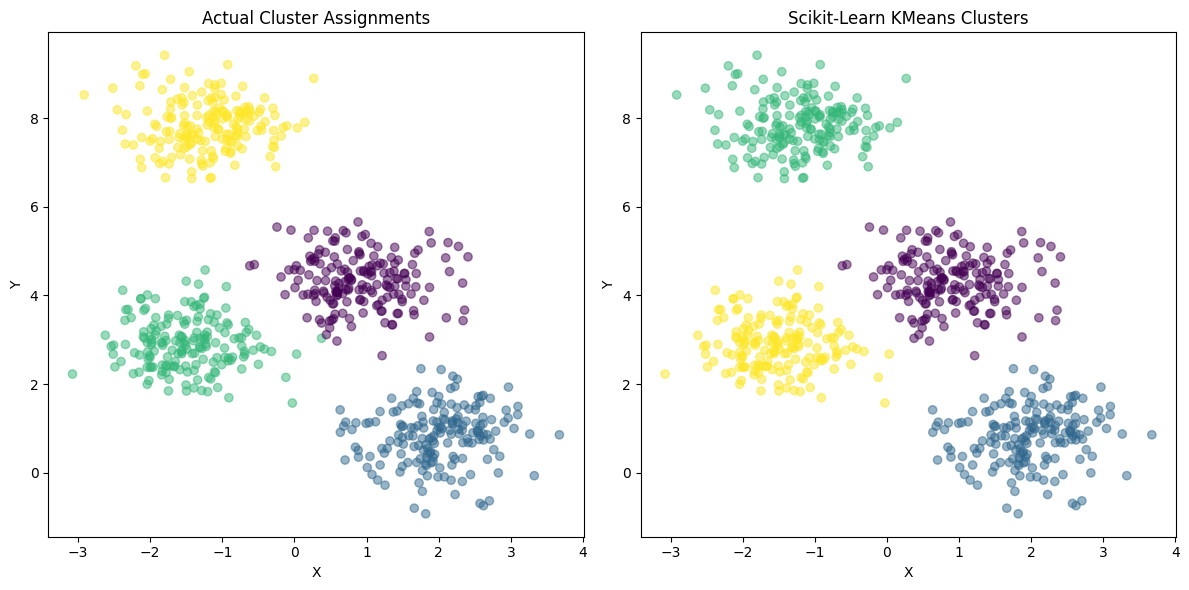

In [126]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.5)
plt.title('Actual Cluster Assignments')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=comparison_df.sk_hypotheses, cmap='viridis', alpha=0.5)
plt.title('Scikit-Learn KMeans Clusters')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

## Comparison of my implementation vs sklearn's implementation

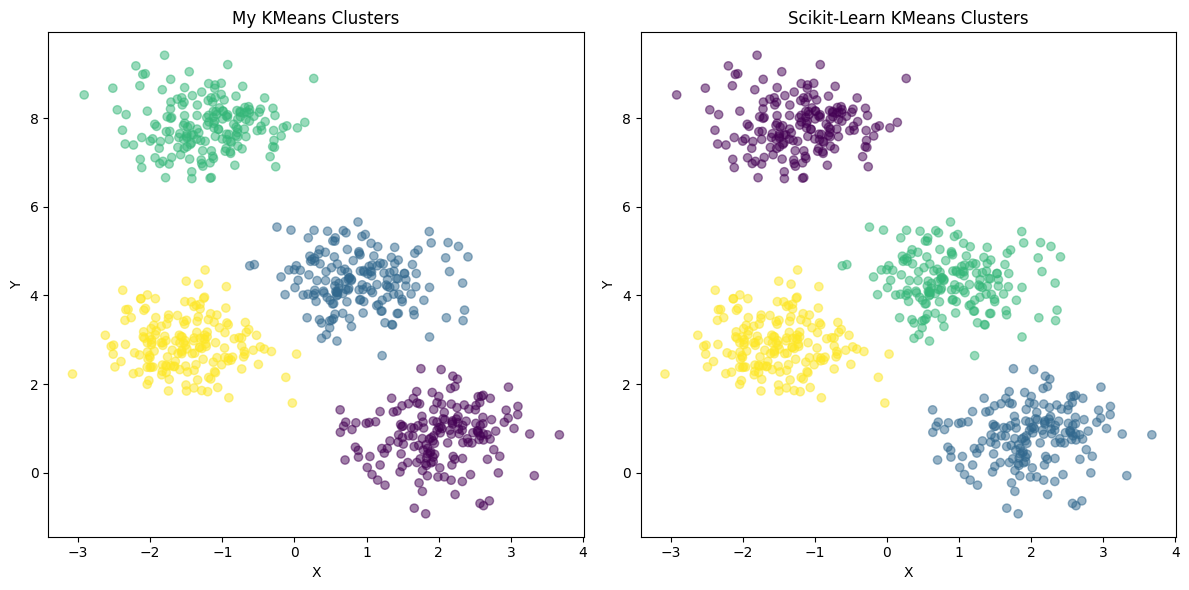

In [37]:
# Plotting the comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=cluster_hypotheses, cmap='viridis', alpha=0.5)
plt.title('My KMeans Clusters')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=comparison_df.sk_hypotheses, cmap='viridis', alpha=0.5)
plt.title('Scikit-Learn KMeans Clusters')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

# Running different Clustering algorithms

**Goals to find out:**

1. The reason why you chose the clustering algorithm(s)
2. Any pre-processing of the data or any hyperparameter settings
3. Output from the algorithm(s) -- show what clusters were generated
4. The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected?

In [3]:
columns = ['X', 'Y']
mopsi_df = pd.read_csv("MopsiLocationsUntil2012-Finland.txt", sep='\t')
mopsi_df.columns = columns
mopsi_df

,X,Y
0,626146,297440
1,626144,297456
2,626004,297394
3,626018,297437
4,626038,297518
...,...,...
13461,626042,297444
13462,625977,297443
13463,626050,297404
13464,625995,297426


In [4]:
mopsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13466 entries, 0 to 13465
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       13466 non-null  int64
 1   Y       13466 non-null  int64
dtypes: int64(2)
memory usage: 210.5 KB


In [29]:
mopsi_df.describe()

,X,Y
count,13466.000000,13466.00000
mean,625094.709936,289004.04270
std,7844.619064,20400.05631
min,599247.000000,212016.00000
25%,625930.000000,296160.00000
50%,626018.000000,297448.00000
75%,626192.000000,297796.75000
max,697835.000000,314328.00000


In [39]:
mopsi_df.corr()

,X,Y
X,1.000000,0.351542
Y,0.351542,1.000000


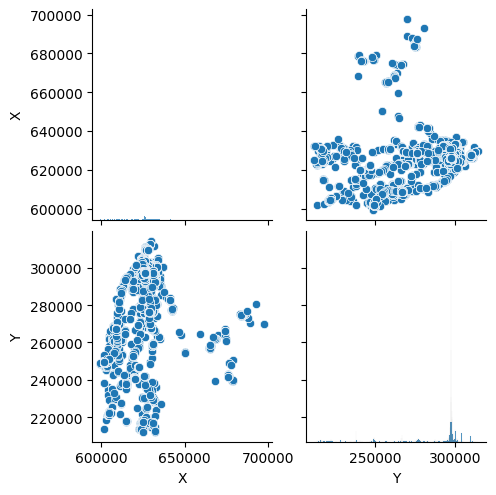

In [31]:
sns.pairplot(mopsi_df)

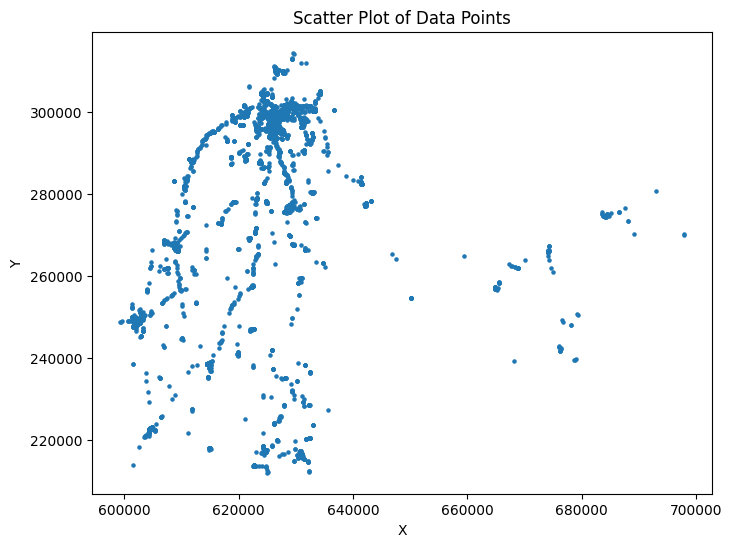

In [22]:
# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(mopsi_df['X'], mopsi_df['Y'], s=5)
plt.title('Scatter Plot of Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [75]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(mopsi_df[['X', 'Y']])
X_scaled

array([[0.13401914, 0.41354153],
       [0.13376418, 0.41432587],
       [0.11591689, 0.41128655],
       ...,
       [0.121781  , 0.41177677],
       [0.11476956, 0.41285523],
       [0.11311231, 0.41310034]])

In [82]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan.fit(X_scaled)
dbscan_clusters = dbscan.labels_
np.unique(dbscan_clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [86]:
# Perform Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical.fit(X_scaled)
hierarchical_clusters = hierarchical.labels_
hierarchical_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

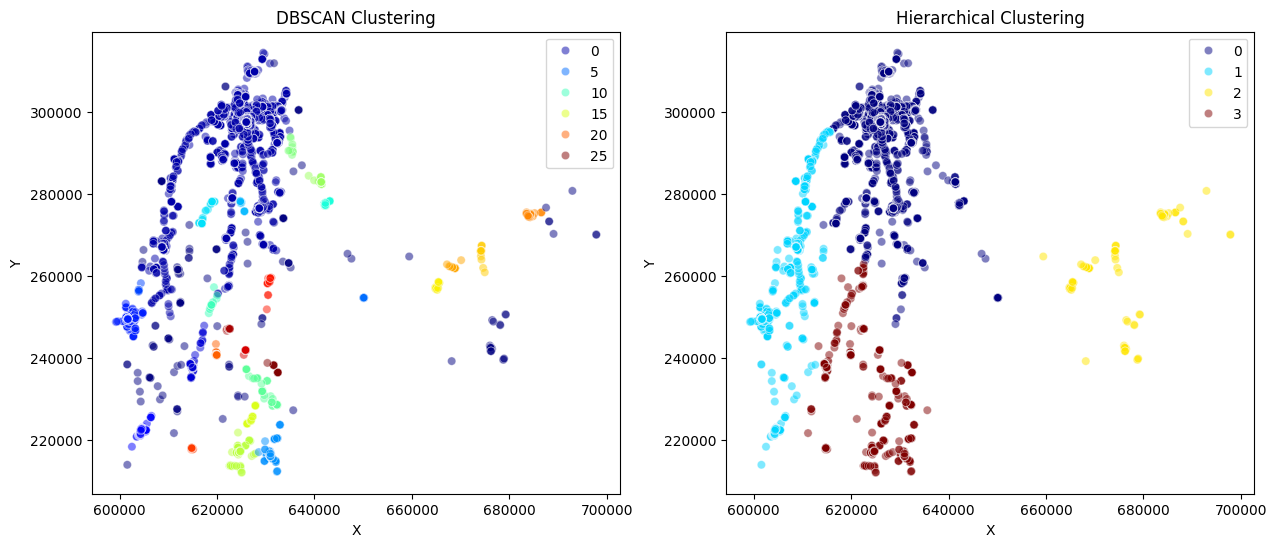

In [96]:
# Visualize the clusters
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data = mopsi_df, x='X', y='Y', hue=dbscan_clusters, palette=plt.get_cmap('jet'), alpha = 0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
sns.scatterplot(data = mopsi_df, x='X', y='Y', hue=hierarchical_clusters, palette=plt.get_cmap('jet'), alpha = 0.5)
plt.title('Hierarchical Clustering')
plt.xlabel('X')
plt.ylabel('Y')

plt.savefig("dbscan_vs_hierarchical.png")
plt.show()

## Q1. Reason for chosing Hierarchical Clustering 
* So as we can see from the above figure, that DBSCAN is not properly generating the clusters. It also labelled some of the outliers (samples whoose X > 65000) into clusters.
* On the other hand Hierarchical clustering perfectly labelled every sample into their own clusters.

## Q2. Preprocessing of data 
* Used StandardScaler to scale mopsi_df data
* **Hyper-parameters for DBSCAN**:
  * eps = **0.2**, min_samples = **10**
* **Hyper-parameters for Hierarchical**:
  * no. of clusters = **3**

## Q3. Output
* No. of clusters generated by DBScan is **26**. (-1 for outliers)
* No. of clusters generated by Hierarchical is **3** (explicitly defined)

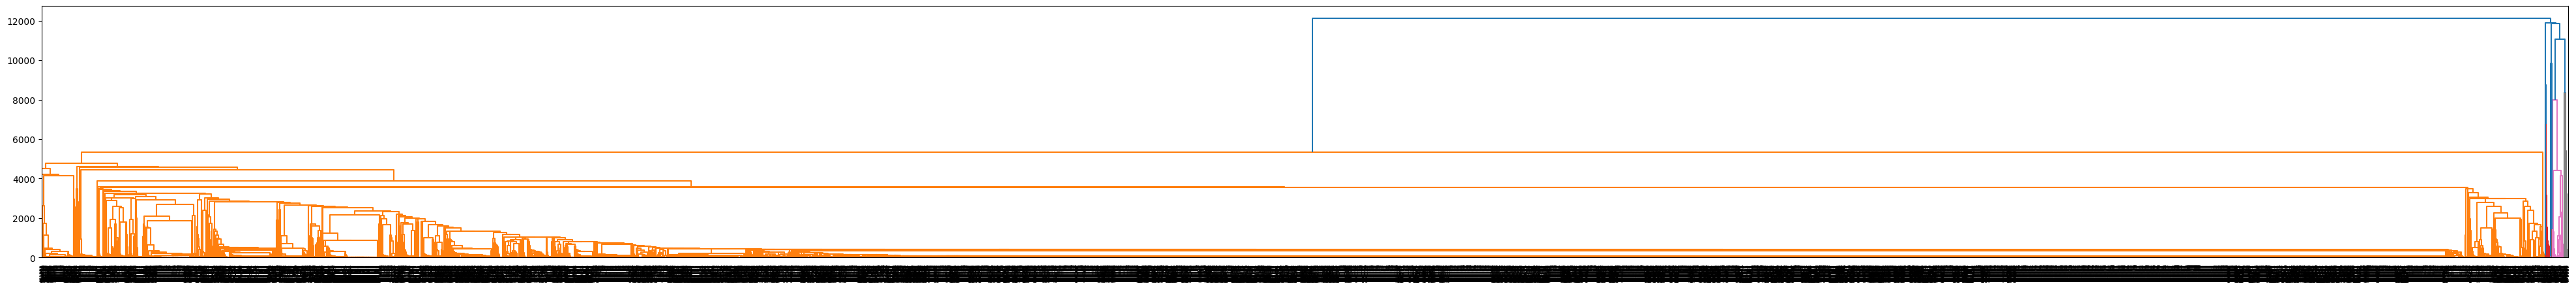

In [65]:
def leaf_label_function(index):
  return mopsi_df.iloc[index, 0]

plt.figure(figsize=(50,5))
dend = dendrogram(linkage(mopsi_df[['X', 'Y']]), leaf_label_func=leaf_label_function)

plt.savefig("mopsi_dendrogram.png")
plt.show()

# Q4. Performance Evaluation

* The metric which I used to evaluate the output of these two algorithms is Silhouette Score. The Silhouette Score measures how well-defined the clusters are and ranges from -1 to 1, where higher values indicate better clustering.
* 
The Silhouette Score fo**r DBSC**AN wa**s 0.50**89, indicating moderate clustering quality, while the Silhouette Score fo**r Hierarchic**al Clustering wa**s 0.82**11, indicating high clustering quali.
* The performance of the Hierarchical Clustering algorithm was better than that of the DBSCAN algorithm, as evidenced by the higher Silhouette Score. This indicates that the clusters produced by Hierarchical Clustering are more well-defined and internally cohesive compared to those produced by DBSCAN.
* I was expecting similar results due to the scatterplot which I did earlier.rithm.







In [98]:
from sklearn.metrics import silhouette_score

In [99]:
silhouette_dbscan = silhouette_score(X_scaled, dbscan_clusters)
print("DBSCAN Silhouette Score:", silhouette_dbscan)

silhouette_hierarchical = silhouette_score(X_scaled, hierarchical_clusters)
print("Hierarchical Clustering Silhouette Score:", silhouette_hierarchical)

DBSCAN Silhouette Score: 0.5089790035584482
Hierarchical Clustering Silhouette Score: 0.8211291975310703
